In [ ]:
Roll no:108806
Name: Rohith R
course name:DA
batch:geetika mam batch (9:30 to 11:30)

In [1]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratary data analysis(EDA)

In [3]:
# Read the data
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
# To get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
# check for null values in the dataset
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
# To describe the dataset to know the central tendency and dispersion in the dataset
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
# To know the number of the columns in the dataset
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [8]:
# To rename a column
df.rename(columns={'Age_08_04':'Age'},inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [9]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

#### Data visualization 

- **histogram-** To know the distribution and dispersion in the dataset
- **boxplot:** To identify the outliers in each feature of the dataset

#### Histogram

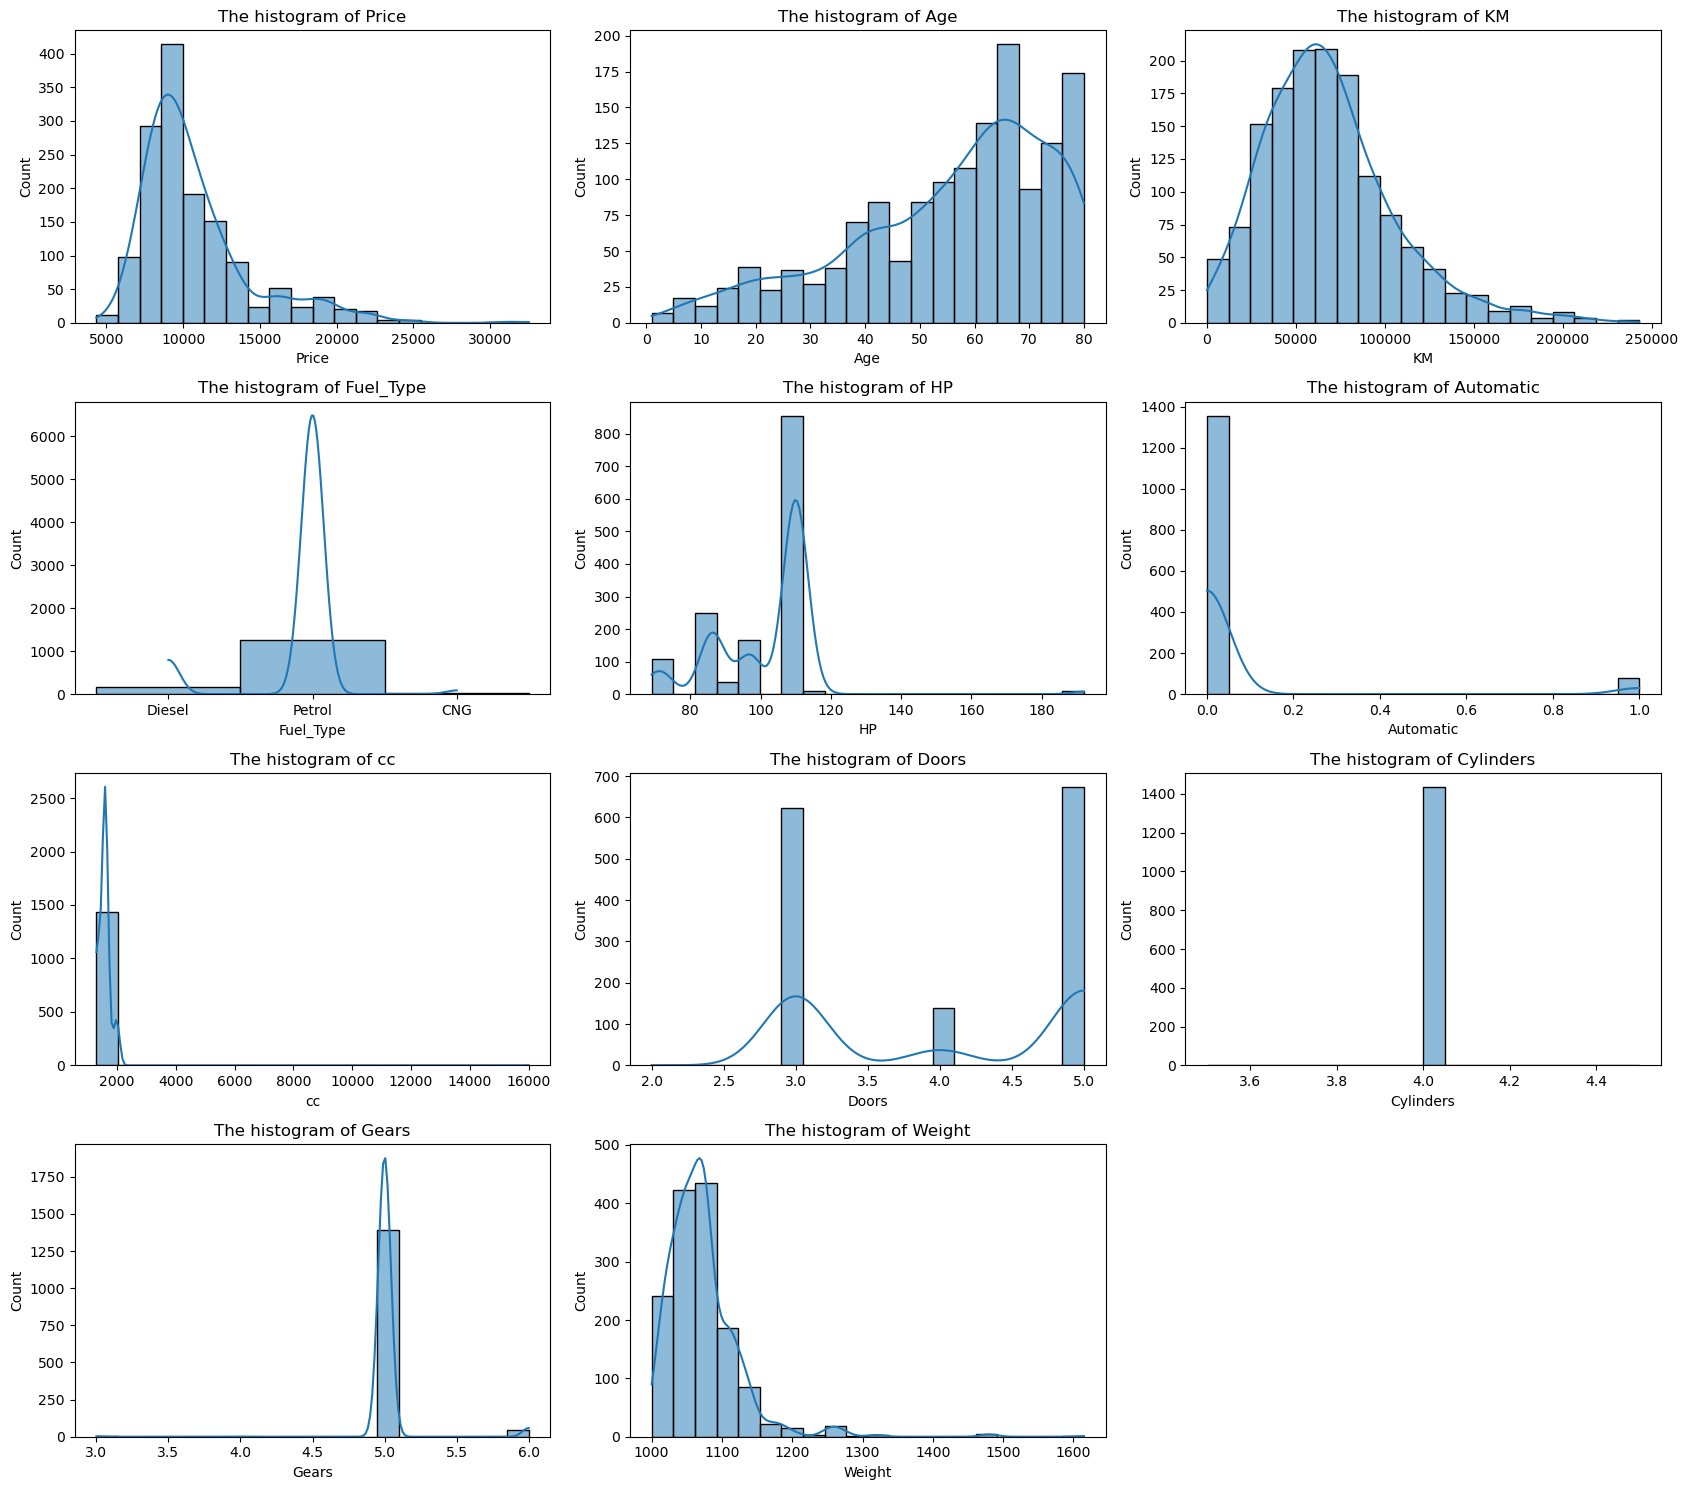

In [13]:
# To fix the figure size
plt.figure(figsize=(17,15))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True,bins=20)
    plt.title(f'The histogram of {col}')
plt.tight_layout()
plt.show()

#### Boxplots

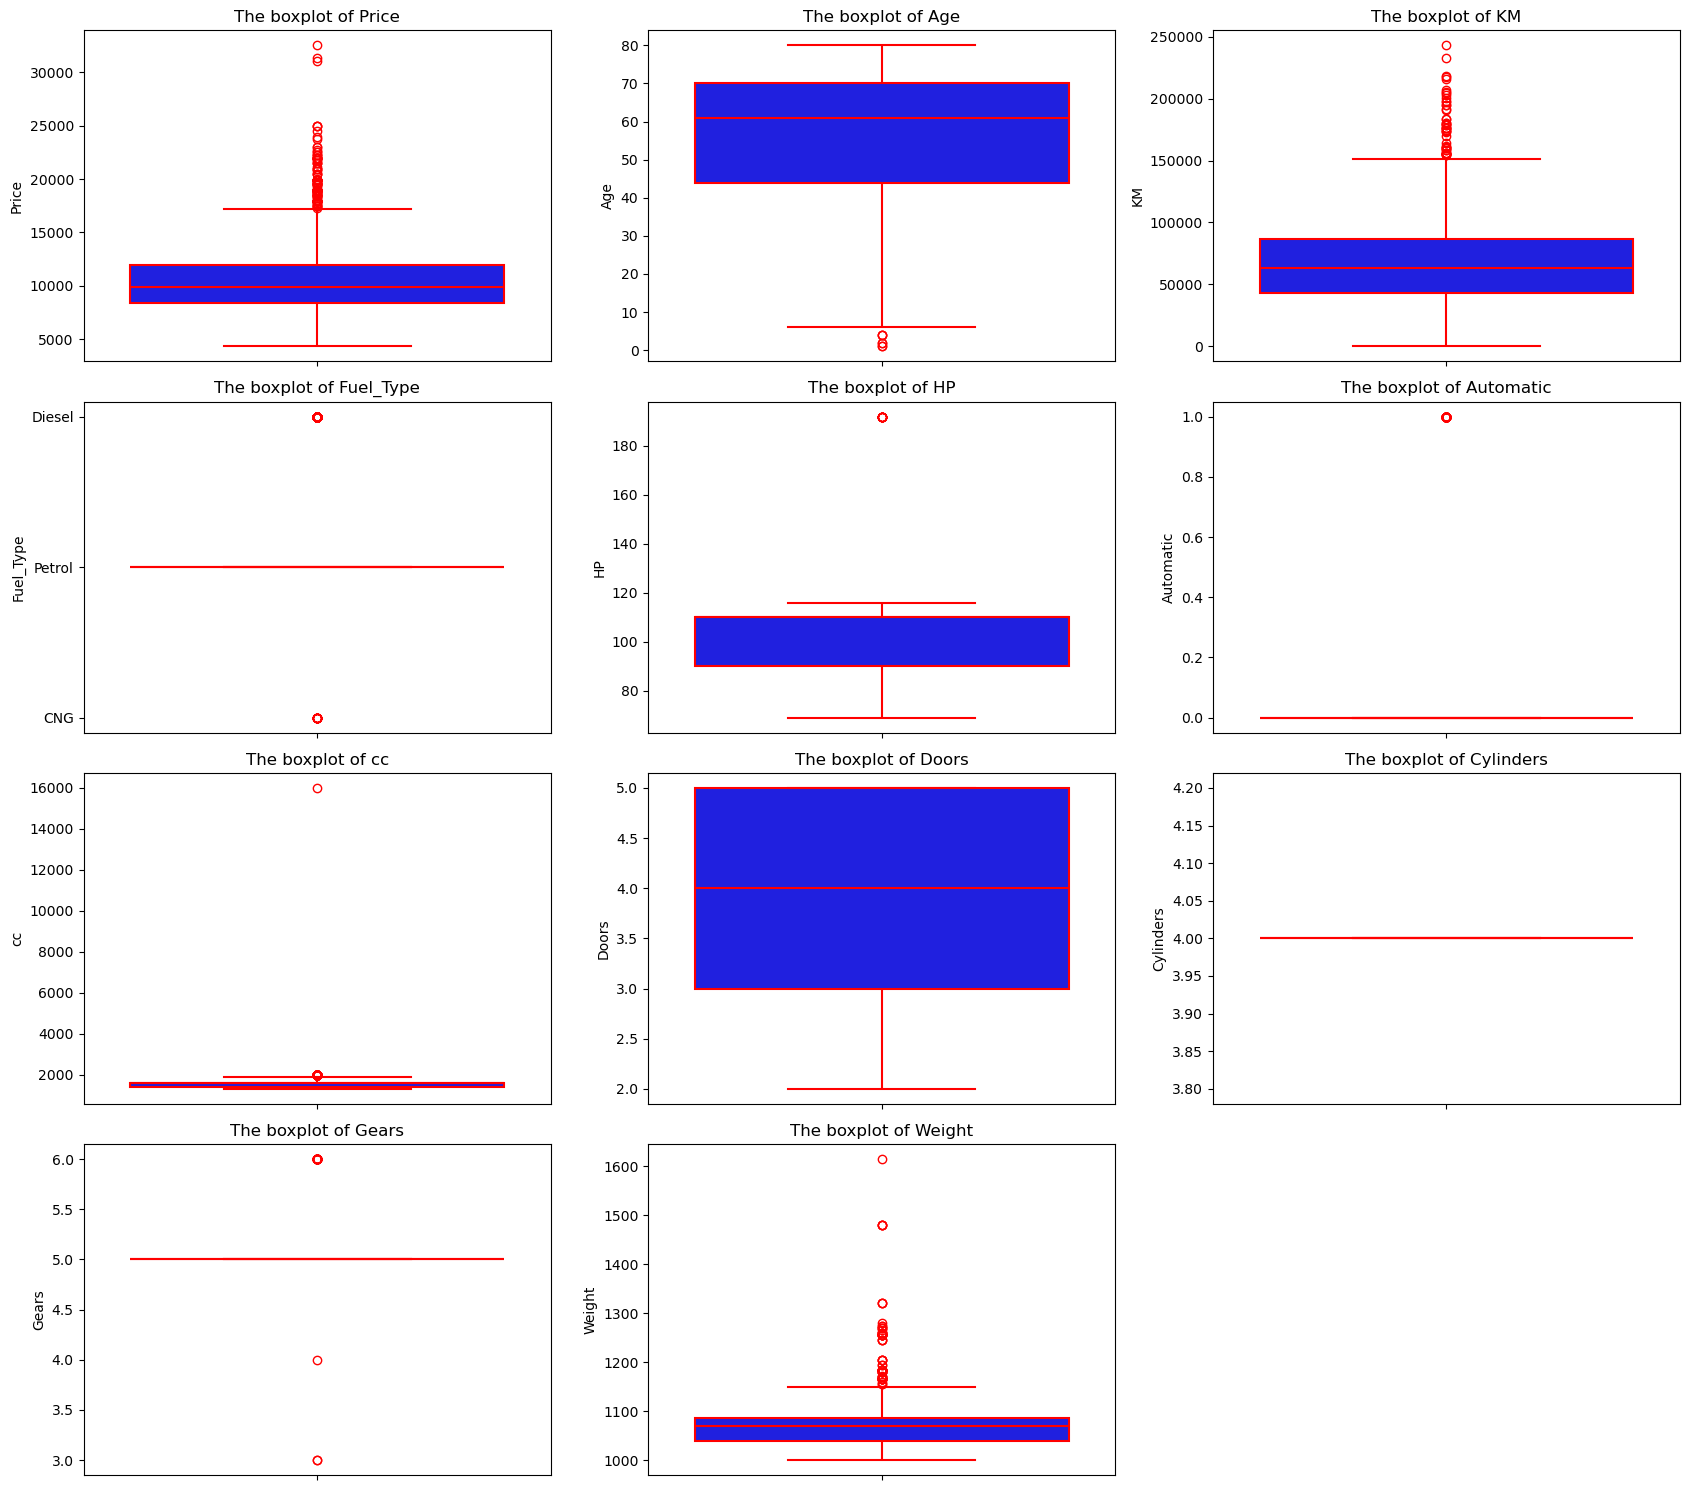

In [15]:
# set the figure size
plt.figure(figsize=(17,15))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[col],color='blue',linecolor='red',linewidth=1.5)
    plt.title(f'The boxplot of {col}')
plt.tight_layout()
plt.show()

- As we can see that from the above boxplots of each column(features) in the dataset, there are many outliers in both upper bound and lower bound which has to treated in the further steps

#### Pairplots

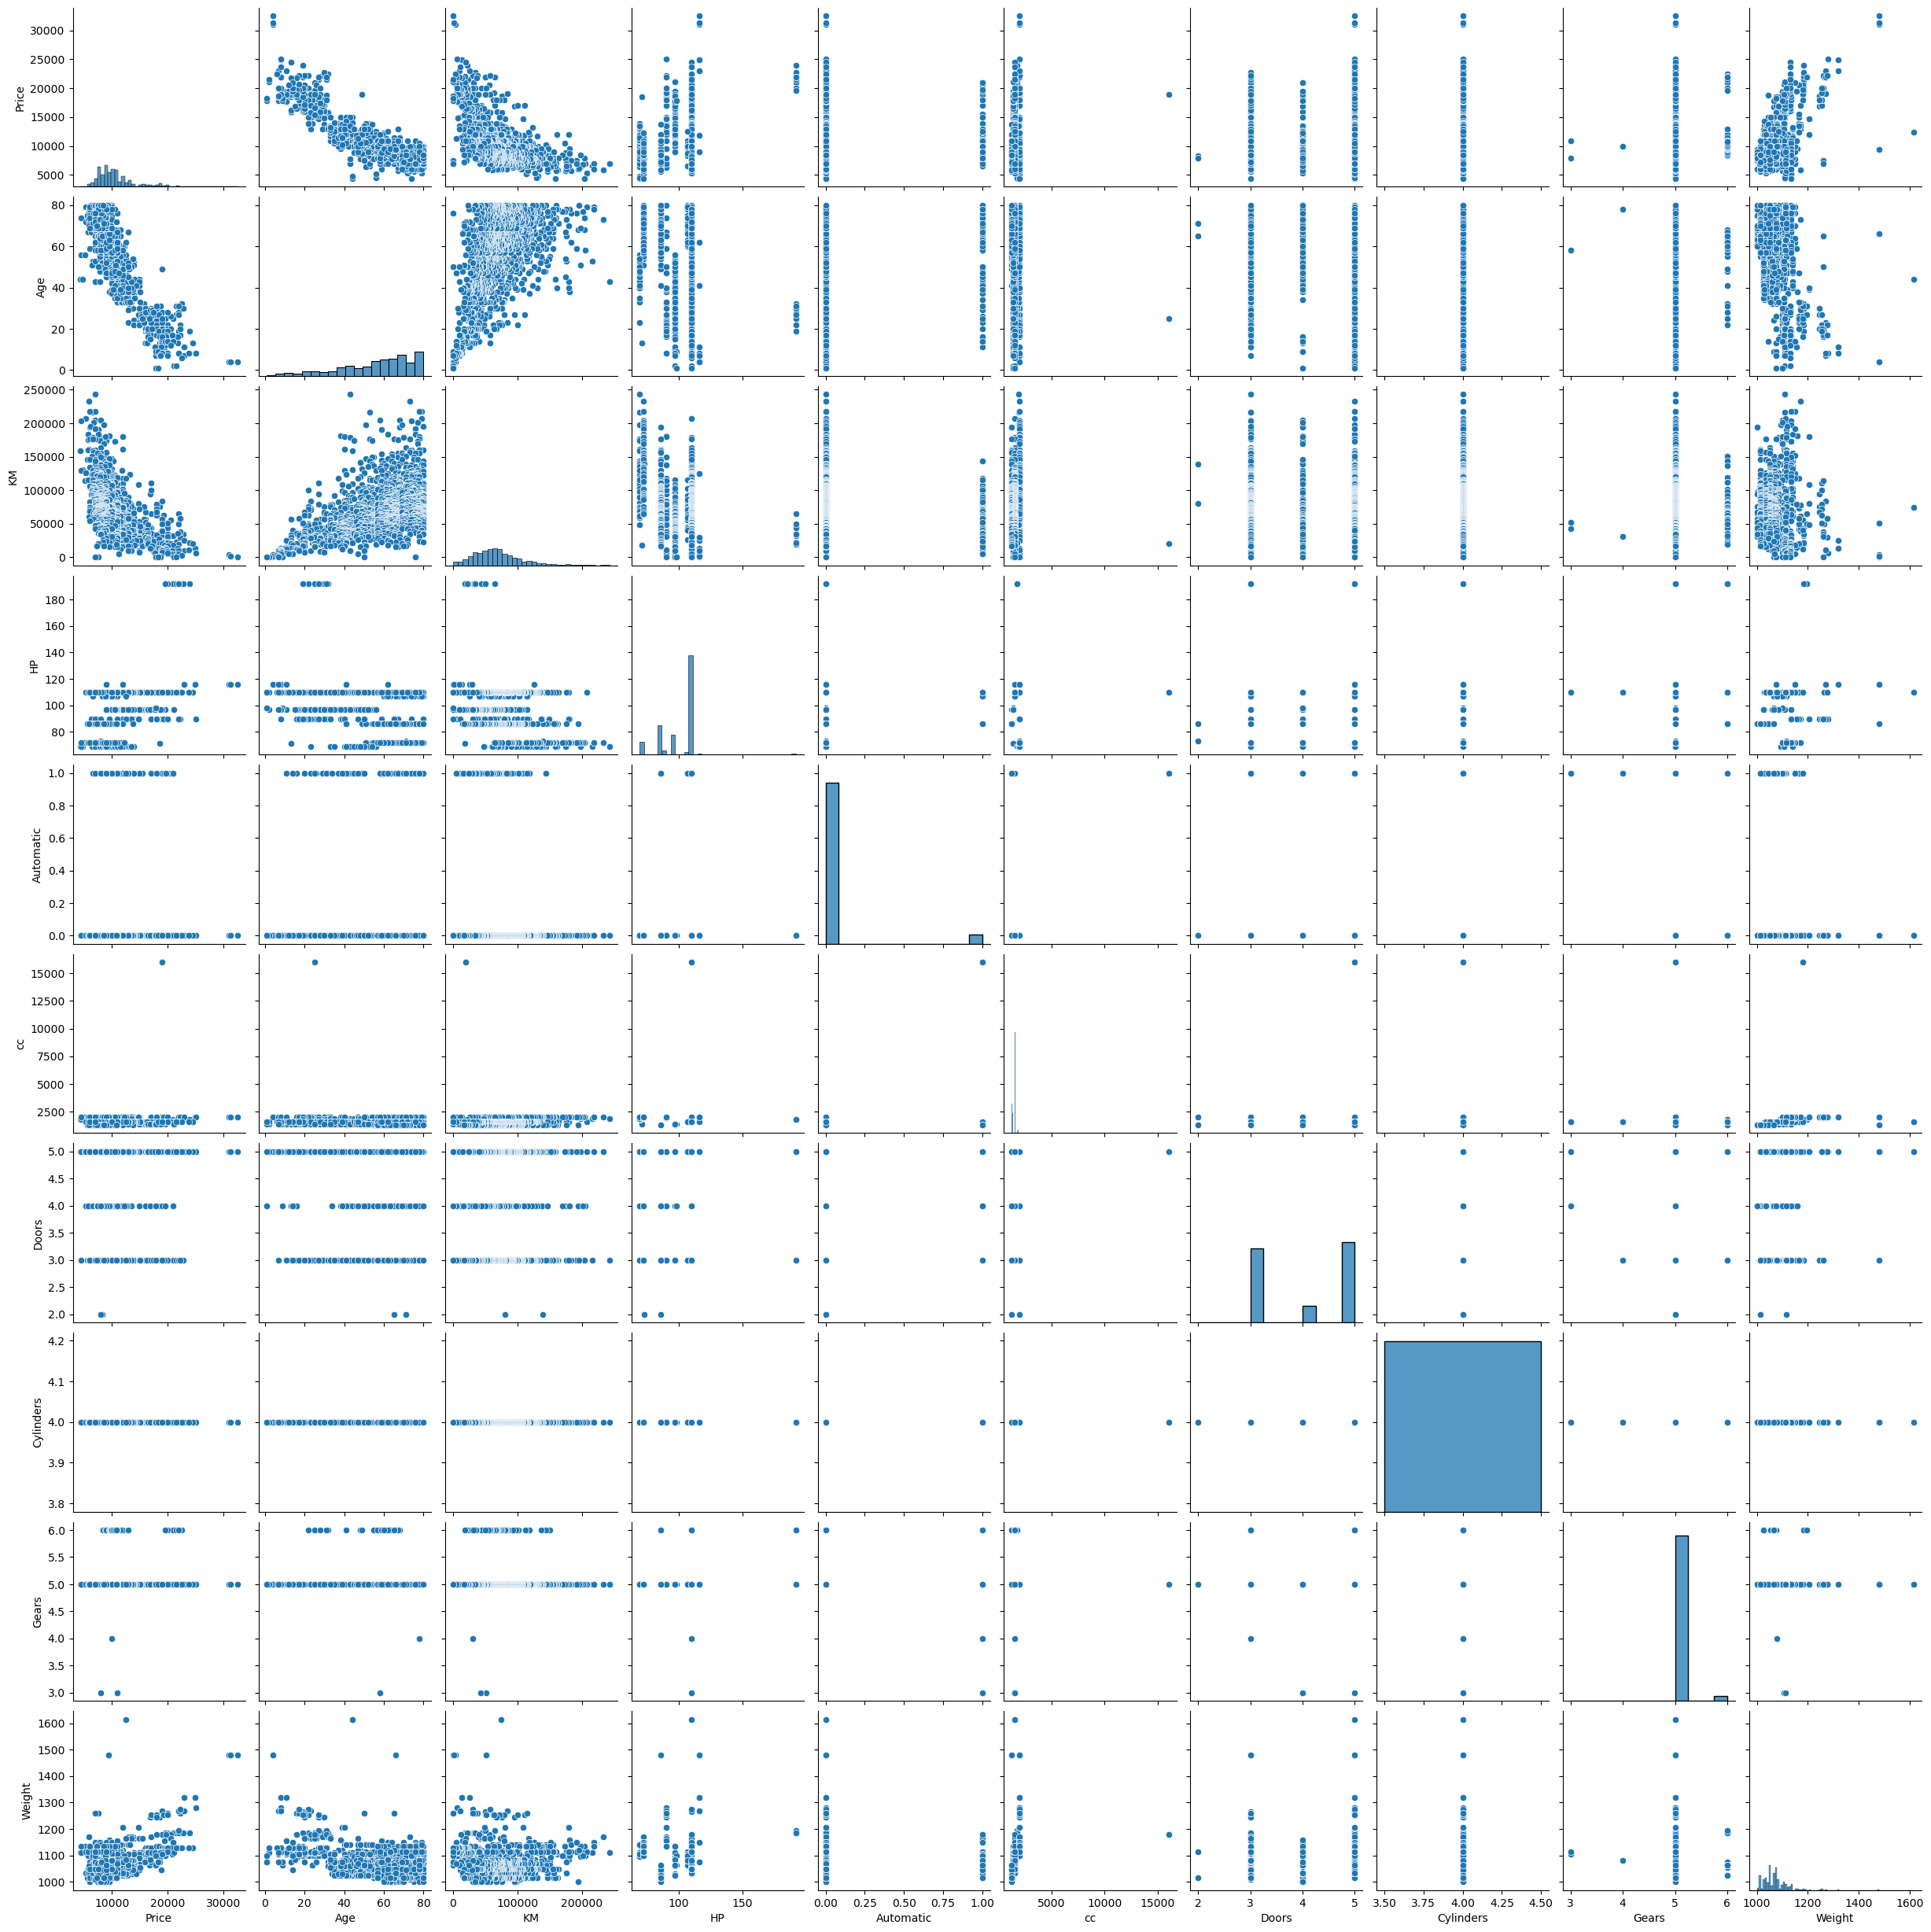

In [18]:
sns.pairplot(df)
plt.show()

- From the above pairplot we cannot see any strong autorelation between the features in the dataset except two or three

In [20]:
# Remove outliers from the dataset
def remove_outliers_replace_with_median(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        median=df[column].median()
        df[column]=df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)
        return df
df1=remove_outliers_replace_with_median(df)
df1

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750.0,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950.0,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950.0,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750.0,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845.0,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500.0,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250.0,70,16916,Petrol,86,0,1300,3,4,5,1015


In [21]:
a=df1['Fuel_Type']

In [22]:
# Fuel_Type is categorical column convert it into numerical using label encoder
from sklearn.preprocessing import LabelEncoder
l_e=LabelEncoder()
l_e=l_e.fit_transform(a)
l_ed=pd.DataFrame(l_e)
l_ed.columns=['Fuel_Type']
l_ed

,Fuel_Type
0,1
1,1
2,1
3,1
4,1
...,...
1431,2
1432,2
1433,2
1434,2


In [23]:
## Target variable
price=df1['Price']

In [24]:
## drop the columns like Fuel_type and price from the dataset
s=df1.drop(['Fuel_Type','Price'],axis=True)
s

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,90,0,2000,3,4,5,1165
1,23,72937,90,0,2000,3,4,5,1165
2,24,41711,90,0,2000,3,4,5,1165
3,26,48000,90,0,2000,3,4,5,1165
4,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025
1432,72,19000,86,0,1300,3,4,5,1015
1433,71,17016,86,0,1300,3,4,5,1015
1434,70,16916,86,0,1300,3,4,5,1015


In [25]:
# Standardization of data to make it feasible for feeding to the model
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_data=scale.fit_transform(s)
s_dataf=pd.DataFrame(scaled_data)
s_dataf.columns=['Age','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']
s_dataf

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


In [26]:
# concate the labelencoding, stadradization and torget variable
final=pd.concat([s_dataf,l_ed,price],axis=1)
final

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type,Price
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,13500.0
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,13750.0
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,13950.0
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,14950.0
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,1,13750.0
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,2,7500.0
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,2,10845.0
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,2,8500.0
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,2,7250.0


### Building the model

### model 1

In [29]:
# split the data into train and test
x=final.iloc[:,0:10]
y=final['Price']

In [30]:
# apply train_test_split from sklearn to fit the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [31]:
# import linearregression from sklearn to build the model
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [32]:
# model 1
# To predict values for training and testing data
y_pred_train=model1.predict(x_train)
y_pred_test=model1.predict(x_test)
y_pred_train

array([ 8009.46876615, 12618.48413113,  9393.58294189, ...,
        8520.29460245,  9112.36158248,  8011.75569425])

### model 2

In [93]:
# split the data into train and test
x2=final.iloc[:,0:9]
y2=final['Price']

In [95]:
# apply train_test_split from sklearn to fit the model
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.20)

In [97]:
# import linearregression from sklearn to build the model
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train2,y_train2)

LinearRegression()

In [99]:
# model 2
# To predict values for training and testing data
y_pred_train2=model2.predict(x_train2)
y_pred_test2=model2.predict(x_test2)
y_pred_train2

array([11302.97363668,  9871.54598508,  7831.98935693, ...,
       13256.47437907,  8987.26336197, 12265.00746695])

### model 3

In [81]:
# split the data into train and test
x3=final.iloc[:,0:7]
y3=final['Price']

In [83]:
# apply train_test_split from sklearn to fit the model
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.2)

In [85]:
# import linearregression from sklearn to build the model
from sklearn.linear_model import LinearRegression
model3=LinearRegression()
model3.fit(x_train3,y_train3)

LinearRegression()

In [87]:
# model 3
# To predict values for training and testing data
y_pred_train3=model3.predict(x_train3)
y_pred_test3=model3.predict(x_test3)
y_pred_train3

array([ 8711.06979608,  8467.56345651,  9961.09704709, ...,
       10364.04553194,  8307.5070167 ,  9604.5066406 ])

## Using metrics like RMSE and r2_score to check the performance of the model

In [44]:
# Model 1
from sklearn.metrics import root_mean_squared_error ,r2_score
RMSE=root_mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)
print(f'The RMSE of model1 is: {np.round(RMSE,3)}')
print(f'The r2_score of model1 is:{np.round(r2,3)}')

The RMSE of model1 is: 1588.022
The r2_score of model1 is:0.529


In [101]:
# Model 2
from sklearn.metrics import root_mean_squared_error ,r2_score
RMSE=root_mean_squared_error(y_test2,y_pred_test2)
r2=r2_score(y_test2,y_pred_test2)
print(f'The RMSE of model2 is: {np.round(RMSE,3)}')
print(f'The r2_score of model2 is:{np.round(r2,3)}')

The RMSE of model2 is: 1730.112
The r2_score of model2 is:0.435


In [91]:
# Model 2
from sklearn.metrics import root_mean_squared_error ,r2_score
RMSE=root_mean_squared_error(y_test3,y_pred_test3)
r2=r2_score(y_test3,y_pred_test3)
print(f'The RMSE of model3 is: {np.round(RMSE,3)}')
print(f'The r2_score of model3 is:{np.round(r2,3)}')

The RMSE of model3 is: 1656.307
The r2_score of model3 is:0.447


## Ridge model

In [110]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=0)#0,1
RR.fit(x_train,y_train)
RR.coef_
ridge_0=pd.DataFrame(RR.coef_)
ridge_0

,0
0,-1.339610e+03
1,-3.952122e+02
2,6.619101e+00
3,9.684317e+01
4,-4.253706e+01
5,1.869219e+02
6,-2.358517e-13
7,1.088608e+02
8,-2.157615e+02
9,-9.514655e+01


In [106]:
RR=Ridge(alpha=1)
RR.fit(x_train,y_train)
RR.coef_
ridge_1=pd.DataFrame(RR.coef_)
ridge_1

,0
0,-1337.614173
1,-395.601889
2,6.443453
3,96.499336
4,-42.516021
5,186.532597
6,0.000000
7,108.613020
8,-214.145475
9,-93.019089


In [112]:
df2=pd.DataFrame(list(x))
df6=pd.concat([df2,ridge_0,ridge_1],axis=1)
df6

,0,0,0
0,Age,-1.339610e+03,-1337.614173
1,KM,-3.952122e+02,-395.601889
2,HP,6.619101e+00,6.443453
3,Automatic,9.684317e+01,96.499336
4,cc,-4.253706e+01,-42.516021
5,Doors,1.869219e+02,186.532597
6,Cylinders,-2.358517e-13,0.000000
7,Gears,1.088608e+02,108.613020
8,Weight,-2.157615e+02,-214.145475
9,Fuel_Type,-9.514655e+01,-93.019089


In [118]:
# dropped the variables which one is nearby the Zero

x_new = x.drop(x.columns[[3,6,7]],axis = 1)
x_new.head()

,Age,KM,HP,cc,Doors,Weight,Fuel_Type
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,1.758561,1
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,1.758561,1
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,1.758561,1
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,1.758561,1
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,1.853577,1


In [136]:
#  used the shuffle cross validation
training_err=[]
testing_err=[]
for i in range(1,100):
    x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y,test_size=0.3,random_state=i)
    RR=Ridge(alpha=0)
    RR.fit(x_train_new,y_train_new)
    y_pred_train_new=RR.predict(x_train_new)
    y_pred_test_new=RR.predict(x_test_new)
    training_err.append(root_mean_squared_error(y_pred_train_new,y_train_new))
    testing_err.append(root_mean_squared_error(y_pred_test_new,y_test_new))
d1=pd.DataFrame(training_err)
d2=pd.DataFrame(testing_err)
print(f'The cross validation training error: {np.round(np.mean(d1),3)}')
print(f'The cross validation testing error: {np.round(np.mean(d2),3)}')

The cross validation training error: 1638.067
The cross validation testing error: 1737.266


## Lasso method

In [141]:
from sklearn.linear_model import Lasso
Ls=Lasso(alpha=0)#0,1
Ls.fit(x_train,y_train)
Ls.coef_
Lasso_0=pd.DataFrame(Ls.coef_)
Lasso_0


,0
0,-1339.610255
1,-395.212226
2,6.619101
3,96.843174
4,-42.537062
5,186.921860
6,0.000000
7,108.860795
8,-215.761467
9,-95.146553


In [143]:
Ls=Lasso(alpha=1)
Ls.fit(x_train,y_train)
Ls.coef_
Lasso_1=pd.DataFrame(Ls.coef_)
Lasso_1

,0
0,-1338.234299
1,-392.462609
2,3.343533
3,94.762993
4,-41.270000
5,184.260822
6,0.000000
7,107.010298
8,-209.068123
9,-71.864096


In [145]:
df2=pd.DataFrame(list(x))
df6=pd.concat([df2,Lasso_0,Lasso_1],axis=1)
df6

,0,0,0
0,Age,-1339.610255,-1338.234299
1,KM,-395.212226,-392.462609
2,HP,6.619101,3.343533
3,Automatic,96.843174,94.762993
4,cc,-42.537062,-41.270000
5,Doors,186.921860,184.260822
6,Cylinders,0.000000,0.000000
7,Gears,108.860795,107.010298
8,Weight,-215.761467,-209.068123
9,Fuel_Type,-95.146553,-71.864096


In [ ]:
#dropped the variables which one is nearby the Zero

x_new = x.drop(x.columns[[3,6,7]],axis = 1)
x_new.head()

In [149]:
#  used the shuffle cross validation
training_err=[]
testing_err=[]
for i in range(1,100):
    x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y,test_size=0.3,random_state=i)
    LR=Lasso(alpha=0)
    LR.fit(x_train_new,y_train_new)
    y_pred_train_new=LR.predict(x_train_new)
    y_pred_test_new=LR.predict(x_test_new)
    training_err.append(root_mean_squared_error(y_train_new,y_pred_train_new))
    testing_err.append(root_mean_squared_error(y_test_new,y_pred_test_new))
d1=pd.DataFrame(training_err)
d2=pd.DataFrame(testing_err)
print(f'The cross validation training _err: {np.round(np.mean(d1),3)}')
print(f'The cross validation testing _err: {np.round(np.mean(d2),3)}')   

The cross validation training _err: 1638.067
The cross validation testing _err: 1737.266


## Interview Questions

### 1.What is Normalization & Standardization and how is it helpful??

**Standardization**

**Definition:** Normalization refers to the process of rescaling the feature values so that they are within a specified range, typically between 0 and 1. This is done using the formula: Normalization = x-min(x)/max(x)-min(x)

**Useful When:**
- You want bounded features (e.g., image pixels).

- Your model is sensitive to absolute magnitudes (like neural networks).

**Normalization**

**Definition:** Standardization (or Z-score normalization) transforms the data such that it has a mean of 0 and a standard deviation of 1. This is done using the formula: Standardization = x-mu/std

**Useful When:**
- Features have different units or distributions.

- You're using linear models, logistic regression, SVM, PCA, etc.

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

- **Remove Highly Correlated Predictors:** Identify and remove one of the correlated variables using a correlation matrix or VIF.

- **Principal Component Analysis (PCA):** Reduce dimensionality by using uncorrelated principal components as predictors.

- **Regularization (Ridge/Lasso Regression):** Apply Ridge (L2) or Lasso (L1) regression to penalize large coefficients and reduce multicollinearity.